In [2]:
import unicodecsv

enrollments = []
f = open('enrollments.csv', 'rb')   # read file in binary mode
reader = unicodecsv.DictReader(f)   # Read csv as dictonary

for row in reader:
    enrollments.append(row)
    
f.close()

enrollments[0]

{u'account_key': u'448',
 u'cancel_date': u'2015-01-14',
 u'days_to_cancel': u'65',
 u'is_canceled': u'True',
 u'is_udacity': u'True',
 u'join_date': u'2014-11-10',
 u'status': u'canceled'}

In [3]:
# Better way of writing the code code
import unicodecsv

with open('enrollments.csv', 'rb') as f:
    enrollments = list(unicodecsv.DictReader(f))
    
enrollments[0]

{u'account_key': u'448',
 u'cancel_date': u'2015-01-14',
 u'days_to_cancel': u'65',
 u'is_canceled': u'True',
 u'is_udacity': u'True',
 u'join_date': u'2014-11-10',
 u'status': u'canceled'}

In [4]:
with open('daily_engagement.csv', 'rb') as f:
    daily_engagement = list(unicodecsv.DictReader(f))
    
with open('project_submissions.csv', 'rb') as f:
    project_submissions = list(unicodecsv.DictReader(f))

### Fixing data types

In [5]:
from datetime import datetime as dt

# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

# Clean up the data types in the enrollments table
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
enrollments[0]

{u'account_key': u'448',
 u'cancel_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'days_to_cancel': 65,
 u'is_canceled': True,
 u'is_udacity': True,
 u'join_date': datetime.datetime(2014, 11, 10, 0, 0),
 u'status': u'canceled'}

In [6]:
# Clean up the data types in the daily_engagement table
for engagement in daily_engagement:
    engagement['lessons_completed'] = int(float(engagement['lessons_completed']))
    engagement['num_courses_visited'] = int(float(engagement['num_courses_visited']))
    engagement['projects_completed'] = int(float(engagement['projects_completed']))
    engagement['total_minutes_visited'] = float(engagement['total_minutes_visited'])
    engagement['utc_date'] = parse_date(engagement['utc_date'])
    
daily_engagement[0]

{u'acct': u'0',
 u'lessons_completed': 0,
 u'num_courses_visited': 1,
 u'projects_completed': 0,
 u'total_minutes_visited': 11.6793745,
 u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

In [7]:
# Clean up the data types in the project_submissions table
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]

{u'account_key': u'256',
 u'assigned_rating': u'UNGRADED',
 u'completion_date': datetime.datetime(2015, 1, 16, 0, 0),
 u'creation_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'lesson_key': u'3176718735',
 u'processing_state': u'EVALUATED'}

How do students who pass the project are different from students who fail ?

In [8]:
### For each of these three tables, find the number of rows in the table and
### the number of unique students in the table. To find the number of unique
### students, you might want to create a set of the account keys in each table.

def get_uniq_num_by_key(dict_list, key):
    uniq_set = set()
    for e in dict_list:
        uniq_set.add(e[key])
    return len(uniq_set)

enrollment_num_rows = len(enrollments)    
enrollment_num_unique_students = get_uniq_num_by_key(enrollments, 'account_key')

engagement_num_rows = len(daily_engagement)
engagement_num_unique_students = get_uniq_num_by_key(daily_engagement, 'acct')

submission_num_rows = len(project_submissions)
submission_num_unique_students = get_uniq_num_by_key(project_submissions, 'account_key')

In [9]:
print enrollment_num_rows, enrollment_num_unique_students

1640 1302


In [10]:
print engagement_num_rows, engagement_num_unique_students

136240 1237


In [11]:
print submission_num_rows, submission_num_unique_students

3642 743


From `daily_engagement` dict, its better to rename the key `acct` to `account_key` for uniformity across sets.

In [12]:
for d in daily_engagement:
    d['account_key'] = d['acct']
    del d['acct']

In [13]:
daily_engagement[0]

{'account_key': u'0',
 u'lessons_completed': 0,
 u'num_courses_visited': 1,
 u'projects_completed': 0,
 u'total_minutes_visited': 11.6793745,
 u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

Now, num of students enrolled is less than the students who are daily engaged. Why is this so ?  
Lets find one such student. 

In [14]:
def get_unique_accounts(data_list):
    uniq_set = set()
    for e in data_list:
        uniq_set.add(e['account_key'])
    return uniq_set

enrollments_uniq_acct = get_unique_accounts(enrollments)
daily_engagement_uniq_acct = get_unique_accounts(daily_engagement)

print(enrollments_uniq_acct - daily_engagement_uniq_acct)

set([u'1304', u'1129', u'1186', u'875', u'1222', u'1213', u'1120', u'749', u'1148', u'707', u'766', u'1125', u'1237', u'870', u'878', u'819', u'1191', u'1190', u'1145', u'733', u'799', u'871', u'1270', u'654', u'727', u'737', u'739', u'914', u'1219', u'1291', u'1010', u'889', u'817', u'1025', u'997', u'996', u'981', u'1171', u'717', u'1218', u'1273', u'1238', u'902', u'711', u'750', u'664', u'1069', u'1284', u'841', u'1044', u'1086', u'1155', u'1079', u'968', u'789', u'1241', u'964', u'725', u'884', u'728', u'1101', u'803', u'802', u'1063', u'926'])


In [15]:
for student in enrollments:
    if student['account_key'] == '1129':  # take account 1129 for example
        print student
        break

{u'status': u'canceled', u'is_udacity': False, u'is_canceled': True, u'join_date': datetime.datetime(2015, 3, 7, 0, 0), u'account_key': u'1129', u'cancel_date': datetime.datetime(2015, 3, 7, 0, 0), u'days_to_cancel': 0}


This account has the same `join_date` and `cancel_date`. Such students did not participate in the enrollments.  
We also know the student with `is_udacity` `True` are udacity test accounts.  
Remove these 2 cases to clean the data.

In [16]:
udacity_test_accounts = set()
for student in enrollments:
    if student['is_udacity']:
        udacity_test_accounts.add(student['account_key'])

print len(udacity_test_accounts)

6


There are **6** Udacity test accounts.

In [17]:
def remove_udacity_accounts(data_list):
    non_udacity_data = []
    for e in data_list:
        if e['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(e)
    return non_udacity_data

In [18]:
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagements = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print len(non_udacity_enrollments)
print len(non_udacity_engagements)
print len(non_udacity_submissions)

1622
135656
3634


In [19]:
paid_students = {}
for student in non_udacity_enrollments:
    if not student['is_canceled'] or student['days_to_cancel'] > 7:
        account_key = student['account_key']
        enrollment_date = student['join_date']
        paid_students[account_key] = enrollment_date
        
len(paid_students)

995

In [20]:
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days >= 0

In [21]:
def remove_free_trial_cancels(data):
    new_data = []
    for data_point in data:
        if data_point['account_key'] in paid_students:
            new_data.append(data_point)
    
    return new_data

paid_engagements = remove_free_trial_cancels(non_udacity_engagements)
paid_enrollments = remove_free_trial_cancels(non_udacity_enrollments)
paid_submissions = remove_free_trial_cancels(non_udacity_submissions)

In [32]:
for engagement in paid_engagements:
    if engagement['num_courses_visited'] > 0:
        engagement['has_visited'] = 1
    else:
        engagement['has_visited'] = 0

In [36]:
## Create a list of rows from the engagement table including only rows where
## the student is one of the paid students you just found, and the date is within
## one week of the student's join date.

paid_engagement_in_first_week = []

for engagement in paid_engagements:
    engagement_date = engagement['utc_date']
    join_date = paid_students[engagement['account_key']]
    
    if within_one_week(join_date, engagement_date):
        paid_engagement_in_first_week.append(engagement)
        
print len(paid_engagement_in_first_week)

6920


### Exploring Student Engagement

In [37]:
from collections import defaultdict

# Create a dictionary of engagement grouped by student.
# The keys are account keys, and the values are lists of engagement records.

def group_data(data, key_name):
    grouped_data = defaultdict(list)
    for data_point in data:
        key = data_point[key_name]
        grouped_data[key].append(data_point)
    return grouped_data

engagement_by_account = group_data(paid_engagement_in_first_week, 'account_key')

In [38]:
# Create a dictionary with the total minutes each student spent in the classroom during the first week.
# The keys are account keys, and the values are numbers (total minutes)

def sum_grouped_items(grouped_data, field_name):
    summed_data = {}
    for key, data_points in grouped_data.items():
        total = 0
        for data_point in data_points:
            total += data_point[field_name]
        summed_data[key] = total
    return summed_data
        
total_minutes_by_account = sum_grouped_items(engagement_by_account, 'total_minutes_visited')

**To apply statistical operations such as calculating mean of a distribution, we use `numpy` library.**

Mean: 305.414718908
Stadard deviation: 405.91261032
Mininum: 0.0
Maximum: 3564.7332645


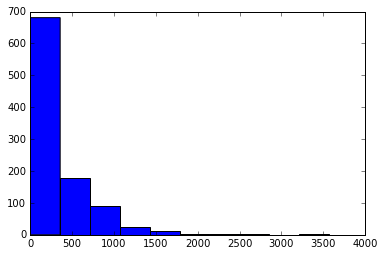

In [69]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Summarize the data about minutes spent in the classroom
def describe_data(data):
    print 'Mean:', np.mean(data)
    print 'Stadard deviation:', np.std(data)
    print 'Mininum:', np.min(data)
    print 'Maximum:', np.max(data)
    plt.hist(data)
    
describe_data(total_minutes_by_account.values())

### Summarize data based on lessons completed

In [70]:
# Summarize data based on lessons completed
lessons_completed_by_account = sum_grouped_items(engagement_by_account, 'lessons_completed')

Mean: 146.888888889
Stadard deviation: 196.647142785
Mininum: 0
Maximum: 625


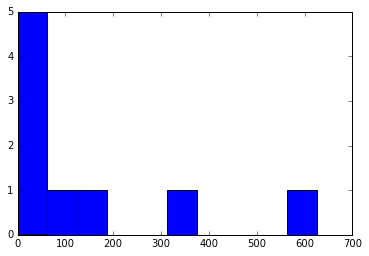

In [71]:
describe_data(lessons_completed_by_account.values())

**Find the distribution of number of days a student has visited the classroom in their first week**

Mean: 246.555555556
Stadard deviation: 428.414936743
Mininum: 1
Maximum: 1333


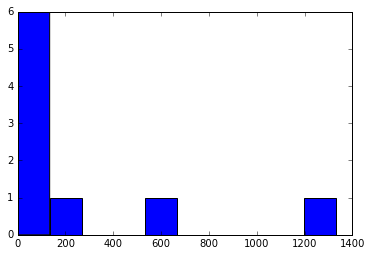

In [72]:
days_visited_by_account = sum_grouped_items(engagement_by_account, 'has_visited')
describe_data(days_visited_by_account.values())

**Calculate the students who passed the subway project and not passed the passed the project**

In [73]:
# keys for subway project
subway_project_lesson_keys = ['746169184', '3176718735']
pass_subway_project = set()

for submission in paid_submissions:
    project = submission['lesson_key']
    rating = submission['assigned_rating']
    
    if project in subway_project_lesson_keys and rating in ['PASSED', 'DISTINCTION']:
        pass_subway_project.add(submission['account_key'])
        
len(pass_subway_project)

647

In [74]:
passing_engagement = []
non_passing_engagement = []

for engagement in paid_engagement_in_first_week:
    if engagement['account_key'] in pass_subway_project:
        passing_engagement.append(engagement)
    else:
        non_passing_engagement.append(engagement)
        
print len(passing_engagement)
print len(non_passing_engagement)

4528
2392


In [75]:
passing_engagement[0]

{'account_key': u'0',
 'has_visited': 1,
 u'lessons_completed': 0,
 u'num_courses_visited': 1,
 u'projects_completed': 0,
 u'total_minutes_visited': 11.6793745,
 u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

In [76]:
p_eng_by_account = group_data(passing_engagement, 'account_key')
np_eng_by_account = group_data(non_passing_engagement, 'account_key')

Passing students
Mean: 391.481722325
Stadard deviation: 439.653061726
Mininum: 0.0
Maximum: 3564.7332645
--------------------------------------------------------------------------------
Non passing students
Mean: 145.399341866
Stadard deviation: 268.97150373
Mininum: 0.0
Maximum: 1768.52274933


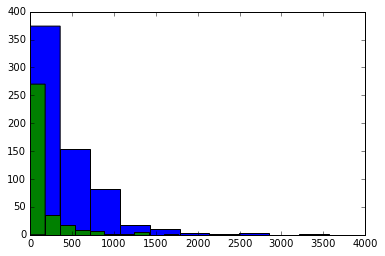

In [77]:
print 'Passing students'
p_eng_minutes = sum_grouped_items(p_eng_by_account, 'total_minutes_visited')
p_eng_minutes_val = p_eng_minutes.values()
describe_data(p_eng_minutes_val)

print '-'*80
print 'Non passing students'
np_eng_minutes = sum_grouped_items(np_eng_by_account, 'total_minutes_visited')
np_eng_minutes_val = np_eng_minutes.values()
describe_data(np_eng_minutes_val)

Passing students
Mean: 2.04327666151
Stadard deviation: 3.1428602763
Mininum: 0
Maximum: 36
--------------------------------------------------------------------------------
Non passing students
Mean: 0.867816091954
Stadard deviation: 2.54833703959
Mininum: 0
Maximum: 27


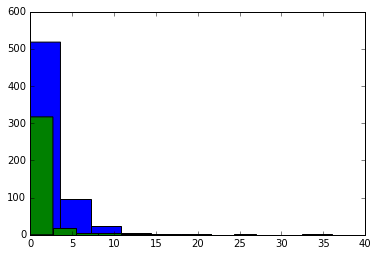

In [78]:
print 'Passing students'
p_eng_lessons_completed = sum_grouped_items(p_eng_by_account, 'lessons_completed')
p_eng_lessons_completed_val = p_eng_lessons_completed.values()
describe_data(p_eng_lessons_completed_val)

print '-'*80
print 'Non passing students'
np_eng_lessons_completed = sum_grouped_items(np_eng_by_account, 'lessons_completed')
np_eng_lessons_completed_val = np_eng_lessons_completed.values()
describe_data(np_eng_lessons_completed_val)

Passing students
Mean: 3.42967542504
Stadard deviation: 2.21298340866
Mininum: 0
Maximum: 7
--------------------------------------------------------------------------------
Non passing students
Mean: 1.95114942529
Stadard deviation: 1.88929952676
Mininum: 0
Maximum: 7


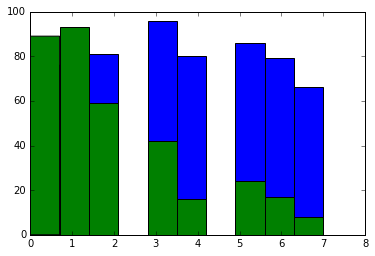

In [79]:
print 'Passing students'
p_eng_has_visited = sum_grouped_items(p_eng_by_account, 'has_visited')
p_eng_has_visited_val = p_eng_has_visited.values()
describe_data(p_eng_has_visited_val)

print '-'*80
print 'Non passing students'
np_eng_has_visited = sum_grouped_items(np_eng_by_account, 'has_visited')
np_eng_has_visited_val = np_eng_has_visited.values()
describe_data(np_eng_has_visited_val)

**Findings**: 

Clearly, passing students spend more time in the classroom. 6.5 hrs and 2.5 hrs is striking amount of difference.  
Also, there are bright students who spend less time but are able to pass.  
But HARD WORK ALWAYS PAYS OFF - Weak students who work hard (3500+ minutes spent in classroom) are also able to pass.

### Visualizing data

**Making historgrams in Python** 

(array([ 3.,  0.,  0.,  2.,  0.,  0.,  2.,  0.,  0.,  1.]),
 array([ 1. ,  1.3,  1.6,  1.9,  2.2,  2.5,  2.8,  3.1,  3.4,  3.7,  4. ]),
 <a list of 10 Patch objects>)

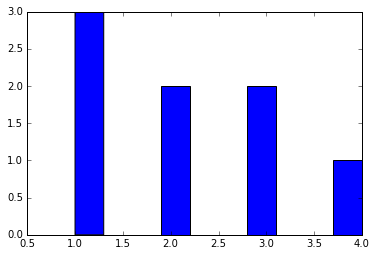

In [80]:
data = [1, 2, 1, 3, 3, 1, 4, 2]

%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(data)

The line `%matplotlib inline` is specifically for IPython notebook, and causes your plots to appear in your notebook rather than a new window. If you are not using IPython notebook, you should not include this line, and instead you should add the line `plt.show()` at the bottom to show the plot in a new window.

**Findings after drawing the histograms:**  

Passing students visit the classroom more. Num of students who visited the classroom once or twice equals the num of students who visit the six or seven times.

## Correlation does not imply Causation

**Correlation**: Students who pass the first project are more likely to visit the classroom in the first week.  
**Causation**: Does visiting the classroom multiple times **cause** the students to pass the project ? *That is not necessary.*  

To determine this we need to conduct some experiments. These experiments in statistical jargon are called **A/B Testing**.

### **Making predictions**  

Which students are likely to pass their first project ?  

Multiple features can affect the outcome for eg. total minutes visited, total lessons completed etc. We must determine the features to take into consideration. Also, these features can be correlated i.e. depend on each other.  

This is where **machine learning** can help us. Various machine learning algorithms can be used to make predictions automatically.

In [83]:
data = [1, 2, 1, 3, 3, 1, 4, 2]

(array([ 3.,  0.,  0.,  2.,  0.,  0.,  2.,  0.,  0.,  1.]),
 array([ 1. ,  1.3,  1.6,  1.9,  2.2,  2.5,  2.8,  3.1,  3.4,  3.7,  4. ]),
 <a list of 10 Patch objects>)

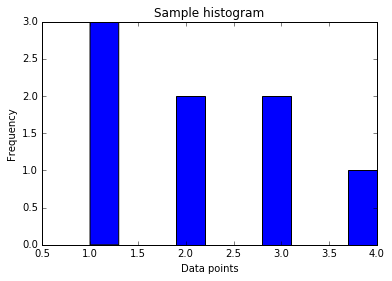

In [88]:
plt.xlabel("Data points")
plt.ylabel("Frequency")
plt.title("Sample histogram")
plt.hist(data)

### Example of `plt.hist`

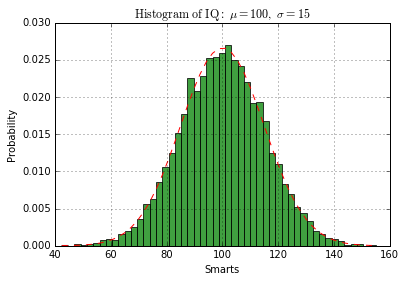

In [89]:
import matplotlib.mlab as mlab

mu, sigma = 100, 15
x = mu + sigma*np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, normed=1, facecolor='green', alpha=0.75)

# add a 'best fit' line
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=1)

plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ IQ:}\ \mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)